In [15]:
import pandas as pd
df = pd.read_csv("NEW_Keywords_loan.csv")
df

,index,selftext,num_comments,score,title,type
0,23,Are payday type loans all I can do?,0,1,"Loans and credit cards, what to expect?",Adult
1,57,Cars are often upside down in their loans. Hom...,4,2,Buying Insurance (car and home/renters),Adult
2,112,"I'm 27F and never had a credit card, but now I...",4,9,Credit???,Adult
3,122,I figured out that to have a 3 month cushion I...,0,1,Savings,Adult
4,123,"He has since set boundaries on what, how much,...",0,1,Can you spot me? (LOANS!),Adult
...,...,...,...,...,...,...
5224,4169,"Do you wish to fucking go back to high school,...",24,1,Do you wish to go back to high shcool?,Adult
5225,4377,"I do have student loans, but they’re not nearl...",12,23,"I’m scared, not able to afford psychiatric med...",Adult
5226,4568,I am wondering what to do for the 19 year old....,32,1,Mom would appreciate your thoughts,Adult
5227,4746,We’ve been living off of my student loans.,0,1,"Hi, I’m a 19 year old girl who’s found herself...",Adult


In [16]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [17]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [18]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0                      Are payday type loan all I can do?
1       Cars are often upside down in their loans. Hom...
2       I'm 27F and never had a credit card, but now I...
3       I figured out that to have a 3 month cushion I...
4       He ha since set boundary on what, how much, an...
                              ...                        
5224    Do you wish to fucking go back to high school,...
5225    I do have student loans, but theyre not nearly...
5226    I am wondering what to do for the 19 year old....
5227            Weve been living off of my student loans.
5228    So I'm gonna take out another loan which hey ,...
Name: selftext, Length: 5229, dtype: object

In [19]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,Are payday type loan all I can do?
1,1,Cars are often upside down in their loans. Hom...
2,2,"I'm 27F and never had a credit card, but now I..."
3,3,I figured out that to have a 3 month cushion I...
4,4,"He ha since set boundary on what, how much, an..."
...,...,...
5224,5224,"Do you wish to fucking go back to high school,..."
5225,5225,"I do have student loans, but theyre not nearly..."
5226,5226,I am wondering what to do for the 19 year old....
5227,5227,Weve been living off of my student loans.


In [20]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,000 loan,000 student,10,10 000,10 year,100,1000,100k,10k,...,worried,worth,x200b,year,year ago,year loan,year old,years,yr,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108889,0.0,0.0,0.223407,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.359984,0.0,0.0,0.369291,0.0,0.0,0.0
5227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [27]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=3, random_state=0)

In [28]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [29]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,personal,home,pay student
1,loan credit,month,paying
2,car,car loan,pay
3,card debt,rate,loan
4,credit score,wa,loan debt
5,score,payment,student loans
6,debt,year,debt
7,credit card,pay,loans
8,card,car,student loan
9,credit,loan,student


Topic 0: credit card/score \
Topic 1: car loan/payment \
Topic 2: student loans 

In [30]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]
# t3=X[X.topic==3]
# t4=X[X.topic==4]

## Compare Emotion across topics

In [31]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [33]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2

# d=sent_df(t3)
# d['topic']=3

# e=sent_df(t4)
# e['topic']=4

In [34]:
final=pd.concat([a,b,c],axis=0)
final.total.describe()

count    5229.000000
mean        0.039424
std         0.186930
min        -3.444444
25%        -0.021907
50%         0.027473
75%         0.121076
max         2.460208
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

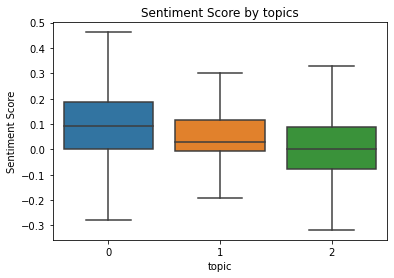

In [37]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [38]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [39]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [40]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,938
1,interest,836
2,like,461
3,ha,397
4,want,274
0,pay,579
1,debt,555
2,no,331
3,sure,66
4,low,63


In [41]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,555
1,interest,92
2,like,70
3,good,57
4,ha,56
0,debt,118
1,pay,53
2,no,51
3,credit,27
4,low,12


In [42]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,interest,567
1,like,299
2,credit,282
3,ha,249
4,want,194
0,pay,340
1,no,150
2,debt,132
3,lower,44
4,sure,40


In [43]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,interest,177
1,credit,101
2,like,92
3,ha,92
4,save,55
0,debt,305
1,pay,186
2,no,130
3,emergency,27
4,No,27


## Word Frequency splitted by sentiment

In [44]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [45]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [46]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.109797]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.001208]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(            words  count
 0    student loan   1065
 1     credit card    355
 2   interest rate    345
 3          loan I    268
 4            I wa    260
 5        car loan    259
 6           I pay    252
 7   personal loan    186
 8    credit score    180
 9  student loans.    147,
             words  count
 0    student loan    598
 1           I pay    152
 2     credit card    137
 3            I wa    130
 4        car loan    117
 5          loan I    112
 6       loan debt    108
 7  student loans,     92
 8  student loans.     90
 9        pay loan     74)

In [47]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(           words  count
 0    credit card    311
 1   student loan    125
 2   credit score    122
 3  personal loan     80
 4    loan credit     70
 5       car loan     63
 6           I wa     48
 7   credit union     48
 8      auto loan     48
 9          I pay     42,
            words  count
 0    credit card    120
 1   student loan     61
 2      card debt     40
 3   credit score     32
 4       car loan     22
 5     card debt,     21
 6          I pay     18
 7  personal loan     18
 8    loan credit     15
 9         loan I     14)

In [48]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(             words  count
 0    interest rate    242
 1     student loan    236
 2             I wa    184
 3           loan I    183
 4         car loan    170
 5            I pay    157
 6    personal loan    106
 7         pay loan    102
 8  monthly payment     94
 9        auto loan     87,
            words  count
 0           I wa     90
 1       car loan     84
 2          I pay     83
 3   student loan     83
 4         loan I     76
 5       pay loan     59
 6  personal loan     47
 7      take loan     39
 8      auto loan     38
 9        loan. I     38)

In [49]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(             words  count
 0     student loan    704
 1   student loans.    117
 2   student loans,    104
 3      pay student     66
 4    interest rate     63
 5        loan debt     60
 6   paying student     57
 7            I pay     53
 8         loans. I     48
 9  federal student     46,
             words  count
 0    student loan    454
 1       loan debt     91
 2  student loans.     74
 3  student loans,     72
 4     pay student     57
 5           I pay     51
 6      loan debt.     47
 7       I student     40
 8        loans. I     34
 9            I wa     29)